### Yêu cầu: hãy gom nhóm tập khách hàng sau của công ty bán lẻ ABC dựa trên 
(i) thu nhập hằng năm (Annual Income) và (ii) điểm thành viên (Spending Score)

Ghi chú: học viên cần xem thêm tài liệu của các thư viện để hiểu rõ các thông số của giải thuật


In [1]:
# Nạp các gói thư viện cần thiết 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### 1. Chuẩn bị dữ liệu

In [2]:
# Đọc dữ liệu từ tập tin csv
df = pd.read_csv('https://raw.githubusercontent.com/ltdaovn/dataset/master/ABC_Customers.csv')
# Chuẩn hóa tên cột
df.rename(index=str, columns={'Annual Income (k$)': 'Income',
                              'Spending Score (1-100)': 'Score'},
inplace=True)
# Lấy dữ liệu thu nhập hằng năm (Annual Income)
# và điểm thành viên (Spending Score) để phân lớp 
X = df.loc[:, ('Income', 'Score')]

### 2. Khởi tạo đồ thị

In [3]:
plt.rcParams['figure.figsize'] = (14, 7)

### 3. Tiến hành gom nhóm
3.1 Sử dụng **KMEANS**

Text(0.5, 1.0, 'KMeans with 5 Clusters')

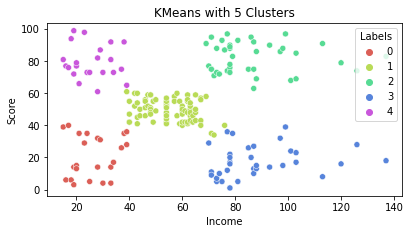

In [4]:
from sklearn.cluster import KMeans 
km5 = KMeans(n_clusters=5).fit(X)

# Vẽ biểu đồ
X['Labels'] = km5.labels_
plt.subplot(2, 2, 1)
sns.scatterplot(X['Income'], X['Score'], hue=X['Labels'], palette=sns.color_palette('hls', 5)) 
plt.title('KMeans with 5 Clusters')

3.2. Sử dụng giải thuật **Agglomerative Hierarchical Clustering**

Text(0.5, 1.0, 'Agglomerative with 5 Clusters')

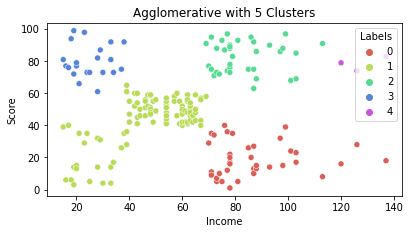

In [5]:
from sklearn.cluster import AgglomerativeClustering
agglom = AgglomerativeClustering(n_clusters=5, linkage='average').fit(X)

# Vẽ biểu đồ
X['Labels'] = agglom.labels_
plt.subplot(2, 2, 2)
sns.scatterplot(X['Income'], X['Score'],
                hue=X['Labels'],
                palette=sns.color_palette('hls', 5))
plt.title('Agglomerative with 5 Clusters')

3.3. Sử dụng giải thuật **DBSCAN**

Text(0.5, 1.0, 'DBSCAN with epsilon 11, min samples 6')

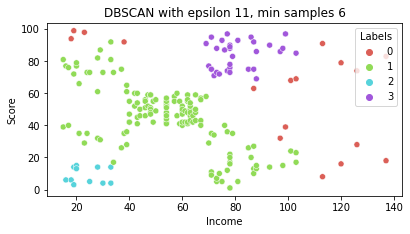

In [6]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=11, min_samples=6).fit(X) # Vẽ biểu đồ
plt.subplot(2, 2, 3)
X['Labels'] = db.labels_+1
sns.scatterplot(X['Income'], X['Score'], 
                hue=X['Labels'],
                palette=sns.color_palette('hls', np.unique(db.labels_).shape[0]))
plt.title('DBSCAN with epsilon 11, min samples 6')

3.4. Sử dụng giải thuật **MeanShift**

Text(0.5, 1.0, 'MeanShift')

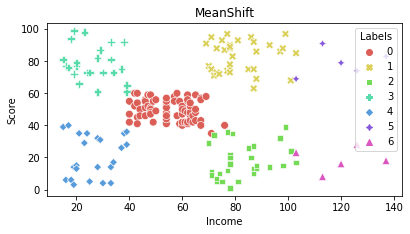

In [7]:
from sklearn.cluster import MeanShift, estimate_bandwidth
bandwidth = estimate_bandwidth(X, quantile=0.1)
ms = MeanShift(bandwidth).fit(X)
X['Labels'] = ms.labels_
plt.subplot(2, 2, 4)
sns.scatterplot(X['Income'], X['Score'], 
                hue=X['Labels'], 
                style=X['Labels'], 
                s=60,
                palette=sns.color_palette('hls', np.unique(ms.labels_).shape[0]))
plt.title('MeanShift')


### 4. Hiển thị đồ thị 

In [8]:
plt.tight_layout()
plt.show()
# prac-7.py to display 4 figures in one

<Figure size 1008x504 with 0 Axes>

(-0.5, 6999.5, 3499.5, -0.5)

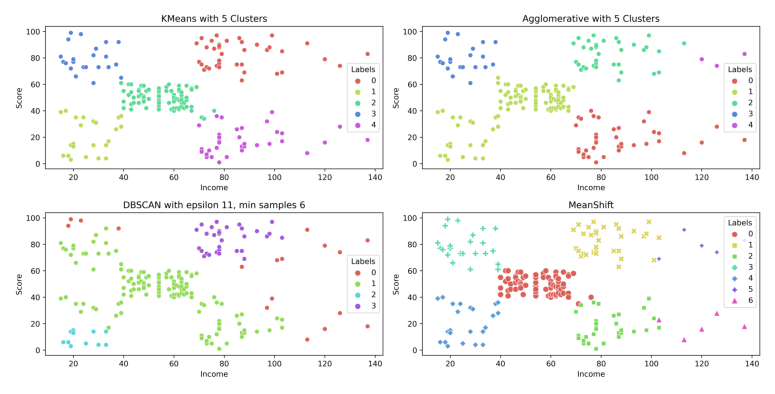

In [9]:
fig = plt.imread('figure7.png')
plt.imshow(fig)
plt.axis('off')